# 로지스틱 회귀 연습문제

### 문제 1

피마 인디언 당뇨병 발병여부를 예측할 수 있는 분석 모델을 구현하기 위해 아래와 같은 항목들을 조사하였다. 분석하라.

| 변수 | 설명 |
|--|--|
| Pregnancies | 임신횟수 |
| Glucose | 포도당 부하 검사 수치 |
| BloodPressure | 혈압 |
| SkinThickness | 팔 삼두근 뒤쪽의 피하지방 측정값 |
| Insulin | 혈청 인슐린 |
| BMI | 체질량 지수 |
| DiabetesPedigreeFunction | 당뇨 내력 가중치 값 - 유전|
| Age | 나이 |
| Outcome | 당뇨여부(0 또는 1) |

> https://data.hossam.kr/E05/indian_diabetes.xlsx

단, 모든 독립변수는 명목형 변수를 포함하지 않으며 정규분포를 만족한다고 가정한다. (더미변수 만들 필요없음)

In [145]:
from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from patsy import dmatrix
import pandas as pd
import sys
import os



sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_logit, scalling

In [146]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['axes.unicode_minus'] = False

In [147]:
df=read_excel("https://data.hossam.kr/E05/indian_diabetes.xlsx")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [148]:
x = list(df.columns)
x.remove("Outcome")
x

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [149]:
# # 데이터 표준화
# df_tmp = df.drop('Outcome',axis=1)
# std_df = scalling(df_tmp)
# std_df['Outcome'] = df['Outcome']
# std_df.head()

In [150]:
# # 로지스틱 회귀분석
# logit_result = my_logit(std_df,y='Outcome',x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
# print(logit_result.summary)

# # 로지스틱은 Pseudo R-squ.가 중요하지 않다. 

# 표준화 적용하기

In [151]:
y_train = df.filter(['Outcome'])
y_train.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [152]:
x_train = df.drop("Outcome",axis = 1)
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [153]:
x_train_std_df = scalling(x_train)
x_train_std_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [154]:
result_df = merge(x_train_std_df, y_train, left_index=True, right_index=True)
result_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [155]:
logit_result = my_logit(result_df, y="Outcome", x=x)
print(logit_result.summary)

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.2718
Time:                        13:25:20   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8711      0.097     -8.986      0.000      -1.061

In [156]:
logit_result.prs

0.27180966859224587

In [157]:
logit_result.cmdf

,Negative,Positive
True,445,156
False,112,55


In [158]:
logit_result.result_df

,설명력(Pseudo-Rsqe),정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specificity, TNR)",RAS,f1_score
0,0.27181,0.782552,0.739336,0.58209,0.11,0.89,0.736045,0.651357


## 문제 2

다음의 데이터는 타이타닉 탑승객 명단 데이터이다. 적절한 데이터 전처리와 정제를 수행한 후 분석하라.

| 변수명 | 설명 |
|---|---|
| PassengerId | 탑승객의 ID(인덱스와 같은 개념) |
| Survived | 생존유무(0은 사망 1은 생존) |
| Pclass | 객실의 등급 |
| Name | 이름 |
| Sex |성별 |
| SibSp | 동승한 형제 혹은 배우자의 수 |
| Parch | 동승한 자녀 혹은 부모의 수 |
| Ticket | 티켓번호 |
| Fare | 요금 |
| Cabin | 선실 |
| Embarked | 탑승지 (C = Cherbourg, Q = Queenstown, S = Southampton) |

> https://data.hossam.kr/E05/titanic.xlsx

단, 모든 독립변수는 정규분포를 만족한다고 가정한다.

In [159]:
df = read_excel("https://data.hossam.kr/E05/titanic.xlsx")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 통계기법으로 생존률 확인하기

## 1. 결측치 확인

In [160]:
df.isnull().sum() # 결측치 확인하기

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [161]:
# 이름과 티켓 번호 삭제 
df = df.drop(["Name","Ticket"],axis=1)

In [162]:
# 선실의 결측값을 채우기 위해 객실 등급에 따른 차이가 있는지 여부를 확인
df1 = df.filter(['Pclass','Cabin']).query('Cabin.isnull()')
df1.fillna(0,inplace=True)
df1.groupby('Pclass').count()

,Cabin
Pclass,
1,40
2,168
3,479


In [163]:
# 근데 별 상관없으므로 변수를 지운다.(변수 자체를 열 단위 제거)
df = df.drop("Cabin",axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


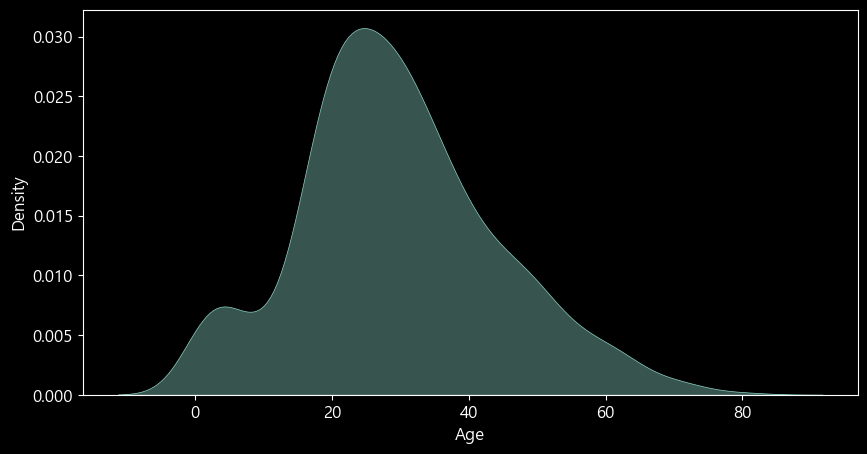

In [164]:
# 나이 결측치를 무엇으로 대체할 것인가에 대해 커널밀도 그래프를 통해 확인

plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
sb.kdeplot(data=df, x='Age', fill=True, alpha=0.4, linewidth=0.5)
plt.show()
plt.close()

해석 : 20~40 사이의 연령층이 가장 많이 분포되어 있음을 알 수 있다. 60대 이상의 노년층 보다는 10세 이하의 어린이가 더 많이 탑승했음을 알 수 있다.

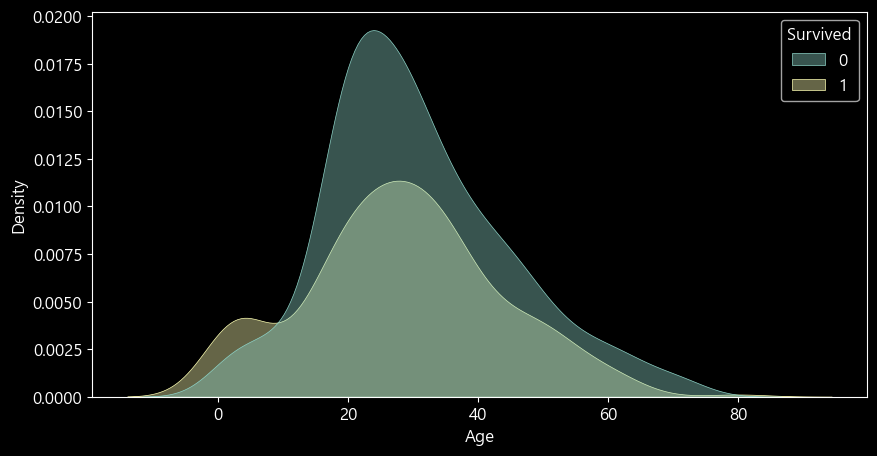

In [165]:
plt.figure(figsize=(10, 5))
sb.kdeplot(data=df, x='Age', hue='Survived', fill=True, alpha=0.4, linewidth=0.5)
plt.show()
plt.close()

해석 : 어린이와 청소년층의 경우 사망자 대비 생존자가 더 많이 분포 된 것이 확인된다. 20세 이상~30세 정도의 연령층과 60세 이상의 노년층에서는 사망자가 더 많이 분포된 것이 확인된다.
> 위 내용으로 미루어 보아 나이는 생존 여부에 영향을 주는 요인으로 판단되어 결측치를 대체하기로 결정

In [166]:
# 나이 결측치
# 나이 결측을 중앙값으로 채움 
df['Age'].fillna(df['Age'].median(axis=0),inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [167]:
# # 탑승지 결측치 
# # 탑승지 데이터가 결측치인 경우는 2건 밖에 되지 않기 때문에 데이터 정제 과정에서 제거 (행단위)
# df2 = df1.query('Embarked.notnull()')
# df2.head()

In [168]:
# 탑승지 결측치 
# 최빈값('S')로 Embarked의 null값 대체
mode_em = df['Embarked'].mode
df['Embarked'] = df['Embarked'].fillna('S')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [169]:
# 탑승객 번호
# 인덱스로 설정

df = df.set_index("PassengerId")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [170]:
df.isna().sum()

# 결측치 모두 제거 완 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 값의 종류에 따라 라벨링 처리


In [171]:
# # 성별 (남/여 - 이렇게 바꾸는 방법도 잇음)
# df['Sex'] = np.where(df["Sex"] == 'male',1,0)
# df.head()

더미변수 처리

In [172]:
# df1 = pd.get_dummies(df,columns=["Pclass","Sex","Embarked"],drop_first=True,dtype='int')
# df1.head()

## 탐색적 데이터 분석을 위한 데이터 타입 변환

dummy 변수 처리 전 상태에서 명목형 변수를 category 타입으로 변환

In [173]:
eda_df = df.astype({'Survived':'category', 'Pclass': 'category', 'Sex': 'category', 'Embarked': 'category'})
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 38.8 KB


## 탐색적 데이터 분석
### 기초 통계량 확인

In [182]:
eda_df.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.361582,0.523008,0.381594,32.204208
std,13.019697,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


각 요인간의 범위가 크게 다르기 때문에 데이터 표준화가 필요한 것으로 판단된다.

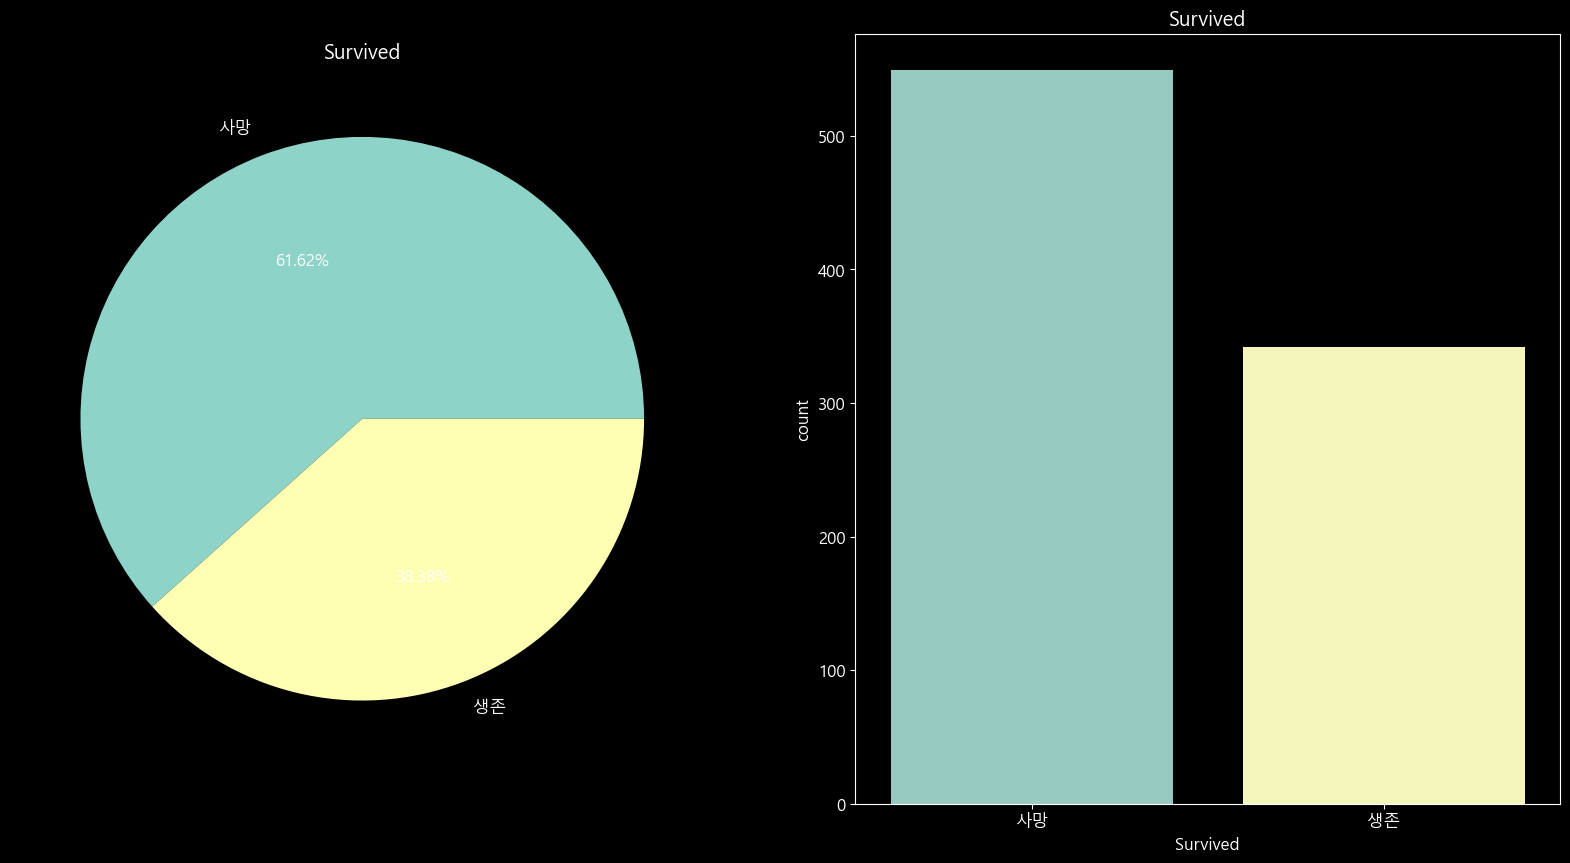

In [183]:
# 생존률 확인하기

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), dpi=100)

vc = eda_df['Survived'].value_counts()
ax1.pie(vc, labels=['사망', '생존'], autopct='%1.2f%%')
ax1.set_title('Survived')
ax1.set_ylabel('')

sb.countplot(x=df['Survived'], ax=ax2)
ax2.set_title('Survived')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['사망', '생존'])

plt.show()
plt.close()

In [184]:
# 각 선실별 생존자 확인
# 각 선실별 탑승객 수
pclass_total_df = eda_df.filter(['Pclass', 'Survived']).groupby('Pclass').count()
pclass_total_df

,Survived
Pclass,
1,216
2,184
3,491


In [185]:
# 각 선실별 생존자 수
pclass_surv_df = eda_df.filter(['Pclass', 'Survived']).query('Survived==1').groupby('Pclass').count()
pclass_surv_df

,Survived
Pclass,
1,136
2,87
3,119


In [189]:
# 각 선실별 생존자 비율
ratio = (pclass_surv_df['Survived'] / pclass_total_df['Survived']) * 100
ratio

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

> 탑승객이 가장 많았던 3등급 객실의 생존자 비율은 24.2%밖에 되지 않고, 탑승객 비율이 크게 높지 않은 1등급 객실의 경우 약 63%의 승객이 생존했다

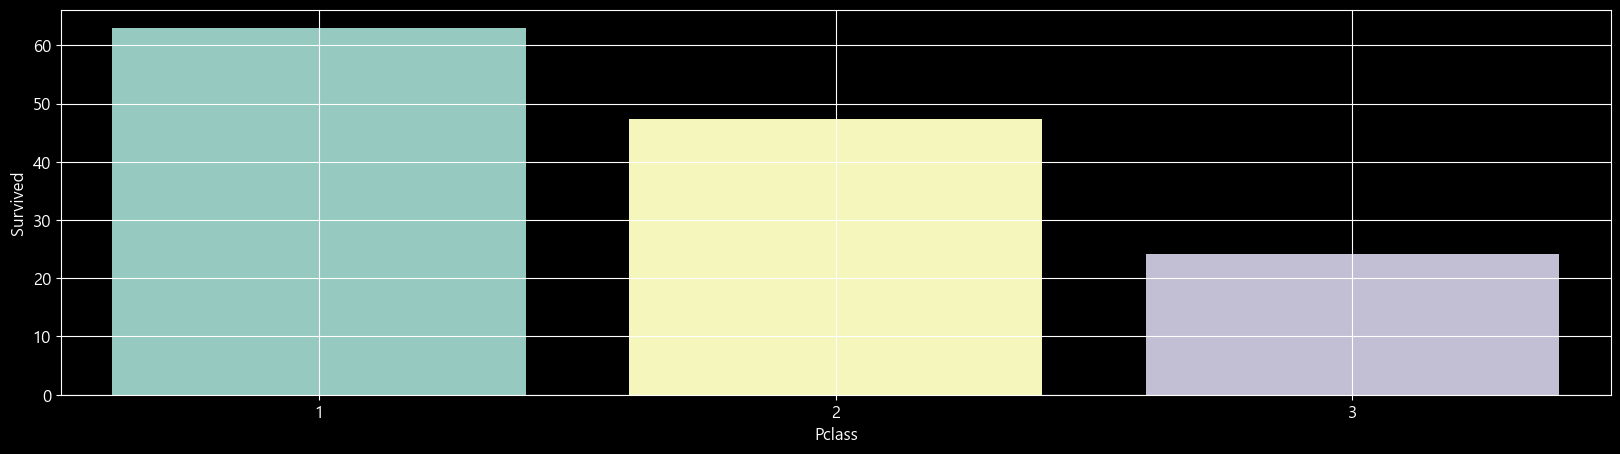

In [191]:
# 각 선실별 생존자 비율 시각화 

plt.figure()
sb.barplot(x=ratio.index, y=ratio)
plt.grid()
plt.ylabel('Survived')
plt.show()
plt.close()

부유층이 많이 탑승했을 것으로 예상되는 1등급 객실의 생존비율이 가장 높은 것을 알 수 있다.

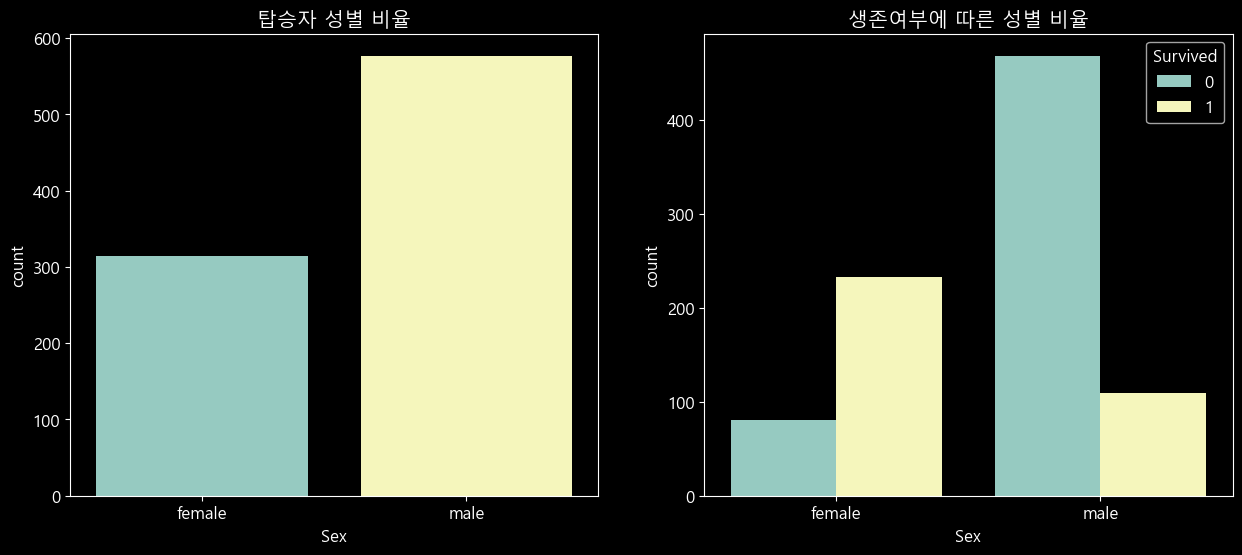

In [192]:
# 성별에 따른 생존률
f, ax = plt.subplots(1,2, figsize=(15, 6))

sb.countplot(x='Sex',data=eda_df, ax=ax[0])
ax[0].set_title('탑승자 성별 비율')

sb.countplot(x='Sex',hue='Survived', data=eda_df, ax=ax[1])
ax[1].set_title('생존여부에 따른 성별 비율')

plt.show()
plt.close()


왼쪽의 그래프를 보면 전체 탑승객의 성비는 남자가 더 높은것으로 나타난다. 하지만 성별에 따른 생존률 비율은 여자가 더 높은 비율로 생존하였고, 남자의 생존 비율은 전체 탑승객 수 대비 현저히 낮은 것으로 파악되었다.

In [175]:
# # 더미 변수화 하기
# df_d = pd.get_dummies(df,columns=['Sex'],drop_first = True, dtype='int')
# dummy_df = pd.get_dummies(df_d,columns=["Embarked"], dtype='int')
# #dummy_df.replace((True,False) , ("1","0"), inplace = True) #  dtype='int'로 하면 replace 안해도 돼 ㅜ
# dummy_df.head()

# 로지스틱 회귀

분석 수행

In [206]:
x = list(cda_df.columns)
x.remove('Survived')
logit_result = my_logit(cda_df, y='Survived', x=x)
print(logit_result.summary)

Optimization terminated successfully.
         Current function value: 0.440539
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.3384
Time:                        13:35:46   Log-Likelihood:                -392.52
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.195e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0642      0.473      8.596      0.000       3.137       4.991
Age           -0.0385      0.

In [207]:
# 혼동행렬
logit_result.cmdf

,Negative,Positive
True,477,240
False,102,72


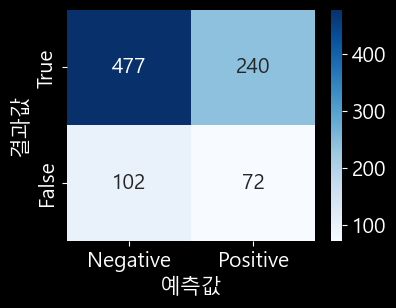

In [208]:
plt.rcParams["figure.figsize"] = (4, 3)
plt.rcParams["font.size"] = 15

sb.heatmap(logit_result.cmdf, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('예측값')
plt.ylabel('결과값')
plt.show()

In [198]:
cda_df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True, dtype='int')
cda_df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,1,0,1
2,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,1,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,0,1
5,0,35.0,0,0,8.0500,0,1,1,0,1


In [209]:
# 평가지표 
logit_result.result_df

,설명력(Pseudo-Rsqe),정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specificity, TNR)",RAS,f1_score
0,0.338443,0.804714,0.769231,0.701754,0.131148,0.868852,0.785303,0.733945


In [213]:
# 실제 데이터 예측해 보기
test_df = DataFrame({
    'dicaprio': [19, 0, 0, 0, 0, 1, 1, 1, 0],  # 영화속 남자 주인공 데이터
    'winslet': [17, 1, 1, 100, 0, 0, 0, 0, 1], # 영화속 여자 주인공 데이터
    'me': [35, 1, 0, 60, 1, 0, 0, 1, 0]  # 임의의 데이터
}, index=['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S'])

vdf = test_df.T
vdf

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
dicaprio,19,0,0,0,0,1,1,1,0
winslet,17,1,1,100,0,0,0,0,1
me,35,1,0,60,1,0,0,1,0


In [214]:
result = logit_result.fit.predict(vdf)
result

dicaprio    0.168903
winslet     0.942348
me          0.826194
dtype: float64

# -------------- 나의 풀이 ---------------------

In [200]:
x = list(cda_df.columns)
x.remove('Survived')
logit_result = my_logit(cda_df, y='Survived', x=x)
print(logit_result.summary)

Optimization terminated successfully.
         Current function value: 0.440539
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.3384
Time:                        13:33:22   Log-Likelihood:                -392.52
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.195e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0642      0.473      8.596      0.000       3.137       4.991
Age           -0.0385      0.

In [212]:
for i, v in enumerate(result.index):
    print("%s님의 생존 확률은 %.2f%% 입니다." % (v, result[i]*100))

dicaprio님의 생존 확률은 16.89% 입니다.
winslet님의 생존 확률은 94.23% 입니다.
me님의 생존 확률은 19.91% 입니다.


PassengerId 아이디 
Pclass 티켓 등급 (n등석)
SibSp 승선중인 형제나 배우자의 수
Parch 승선 중인 부모나 자녀의 수
Fare 티켓 요금
Cabin 방번호
Embarked 승선한 항구의 이름 (C=cherbourg,Q=퀸즈타운,S = Southampton)
ticket 티켓번호 

'Sex_male','Embarked_C','Embarked_Q','Embarked_S''Survived','Pclass','Age','SibSp','Parch','Ticket','Fare','Cabin'

####  탐색적(명목:카테고리) -> 추론적(카테고리X)
순서 -> 그래프 그려보고 -> 유의미하면 분산분석 ANOVA 하고 -> 유의미하면 독립변수에 추가 

In [176]:
df.astype({"Survived":"category","Survived":"category","Pclass":"category","Survived":"category","Survived":"category",})

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [177]:
# 기초 통계량 확인
df.describe()
# 데이터 표준화를 해야 하는구나 하고 알아야함. (4분위수 차이가 크고, 각 요인간의 범위가 다름)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [178]:
mdf = df1.copy()
mdf.head()

,Pclass,Cabin
0,3,0
2,3,0
4,3,0
5,3,0
7,3,0


In [201]:
# 각 선실별 생존자 확인
# 각 선실별 탑승객 수
pclass_total_df = eda_df.filter(['Pclass', 'Survived']).groupby('Pclass').count()
pclass_total_df

,Survived
Pclass,
1,216
2,184
3,491


In [202]:
# 각 선실별 생존자 수
pclass_surv_df = eda_df.filter(['Pclass', 'Survived']).query('Survived==1').groupby('Pclass').count()
pclass_surv_df

,Survived
Pclass,
1,136
2,87
3,119


In [203]:
# 각 선실별 생존자 비율
ratio = (pclass_surv_df['Survived'] / pclass_total_df['Survived']) * 100
ratio

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

탑승객이 가장 많았던 3등급 객실의 생존자 비율은 24.2%밖에 되지 않고, 탑승객 비율이 크게 높지 않은 1등급 객실의 경우 약 63%의 승객이 생존했다

In [179]:
# 표준화 적용 
sdf = scalling(mdf.filter(['Pclass','Age','SibSp','Parch','Fare']))
sdf.head()

,Pclass
0,0.612706
1,0.612706
2,0.612706
3,0.612706
4,0.612706


In [180]:
# 표준화 원데이터에 붙여넣기 
mdf['Pclass'] = sdf['Pclass']
mdf['Age'] = sdf['Age']
mdf['SibSp'] = sdf['SibSp']
mdf['Parch'] = sdf['Parch']
mdf['Fare'] = sdf['Fare']
mdf = mdf.drop('PassengerId',axis=1) # 승선권 삭제 
mdf.head()

KeyError: 'Age'

In [ ]:
a = df.columns
a

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## # helper를 사용한 풀이 

In [ ]:
x_list = ['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_C','Embarked_Q','Embarked_S']

In [ ]:
alogit_result = my_logit(mdf, y='Survived', x=x_list)
print(logit_result.summary)

Optimization terminated successfully.
         Current function value: 0.440392
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.2718
Time:                        10:21:43   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8711      0.097     -8.986      0.000      -1.061

In [ ]:
logit_result.result_df

,설명력(Pseudo-Rsqe),정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specificity, TNR)",RAS,f1_score
0,0.27181,0.782552,0.739336,0.58209,0.11,0.89,0.736045,0.651357
